In [2]:
#importamos las librerias basicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importamos las librerias de Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generamos el conjunto de datos

In [3]:
datos = pd.read_csv("Datos de potabilidad_agua.csv")
datos

,ph,Dureza,Solidos,Cloraminas,Sulfatos,Conductividad,Carbon_organico,Halogeno_metano,Turbiedad,Potabilidad
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
# "iloc" permite seleccionar filas y columnas por su posición
# "values" convierte el dataframe a un array de numpy
x = datos.iloc[:, 0:9].values # seleccionamos las columnas de 0 a 8 y las filas de 0 a 1999
x

array([[           nan, 2.04890456e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608007e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [5]:
y = datos.iloc[:, 9].values #separamos la variable dependiente
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# imputacion de datos faltantes

In [7]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #"mean" es la media de la columna
imputer = imputer.fit(x[:, 0:9]) #ajustamos el imputador a los datos
x[:, 0:9] = imputer.transform(x[:, 0:9]) #transformamos los datos
x

array([[7.08079450e+00, 2.04890456e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608007e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

# Estandarizar las escalas

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #creamos el objeto scaler
scaler = scaler.fit(x) #ajustamos el scaler a los datos
x = scaler.transform(x) #transformamos los datos
x

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

# separamos los datos en el conjunto de entrenamiento y el conjunto
# de prueba 80% de los datos para entrenamiento y 20% para prueba

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #random_state es la semilla para la aleatoriedad

# creamos el modelo de la red neuronal

In [10]:
red = Sequential() #creamos el modelo secuencial
entrada = Dense(units=9, activation='relu') #capa de entrada con 9 neuronas y funcion de activacion relu
oculta1 = Dense(units=1000, activation='relu') #capa oculta con 50 neuronas y funcion de activacion relu
oculta2 = Dense(units=1000, activation='relu') #capa oculta con 100 neuronas y funcion de activacion relu
salida = Dense(units=1, activation='sigmoid') #capa de salida con 1 neurona y funcion de activacion sigmoide
red.add(entrada) #agregamos la capa de entrada al modelo
red.add(oculta1) #agregamos la capa oculta 1 al modelo
red.add(oculta2) #agregamos la capa oculta 2 al modelo
red.add(salida) #agregamos la capa de salida al modelo
red.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
            loss='binary_crossentropy', 
            metrics=['accuracy']) #compilamos el modelo con el optimizador SGD y la funcion de perdida binary_crossentropy


# Realizamos el entrenamiento

In [17]:
history = red.fit(x_train, y_train, epochs=1000, batch_size=30, validation_split=0.2) #entrenamos el modelo con 100 epocas y un tamaño de lote de 32

Epoch 1/1000
70/70 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 0.7114 - val_loss: 0.6357 - val_accuracy: 0.6622
Epoch 2/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7128 - val_loss: 0.6343 - val_accuracy: 0.6565
Epoch 3/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 0.7137 - val_loss: 0.6337 - val_accuracy: 0.6546
Epoch 4/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.7090 - val_loss: 0.6322 - val_accuracy: 0.6565
Epoch 5/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7137 - val_loss: 0.6340 - val_accuracy: 0.6546
Epoch 6/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.5519 - accuracy: 0.7109 - val_loss: 0.6336 - val_accuracy: 0.6584
Epoch 7/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.7161 - val_loss: 0.6367 - val_accuracy: 0.6622
Epoch 

# Graficamos la pecision de la red con respecto a las epocas

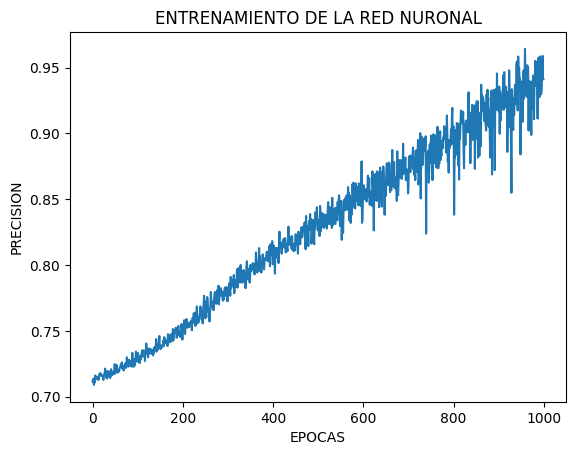

In [18]:
plt.title("ENTRENAMIENTO DE LA RED NURONAL") #titulo de la grafica
plt.xlabel("EPOCAS") #etiqueta del eje x
plt.ylabel("PRECISION") #etiqueta del eje y
plt.plot(history.history['accuracy'], label='accuracy') #graficamos la exactitud del modelo
plt.show() #mostramos la grafica

In [19]:
y_prediccion = red.predict(x_test) #hacemos la prediccion con el conjunto de prueba
y_prediccion = np.round(y_prediccion) #redondeamos los resultados a 0 o 1
y_prediccion

21/21 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [21]:
from sklearn.metrics import accuracy_score #importamos la funcion de precision
score = accuracy_score(y_test, y_prediccion) #calculamos la precision
result = red.evaluate(x_test, y_test) #evaluamos el modelo con el conjunto de prueba
print("Precision del modelo: ", score) #imprimimos la precision del modelo
print("Resultado del modelo: ", result) #imprimimos el resultado del modelo

21/21 [==============================] - 0s 2ms/step - loss: 1.5727 - accuracy: 0.6067
Precision del modelo:  0.6067073170731707
Resultado del modelo:  [1.5726515054702759, 0.6067073345184326]


In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_prediccion) #matriz de confusion
print("Matriz de confusion: ", matrix) #imprimimos la matriz de confusion

Matriz de confusion:  [[350  62]
 [153  91]]
